# KNN e SVM

## Leitura das bases

In [2]:
import pandas as pd

In [32]:
df = pd.read_csv("/Users/jeffsantos/Desktop/9DTSR/git/9DTSR/Machine Learning/Trabalhinhos/bases/titanic.csv")
df

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,28.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1305,1306,39.0,108.9000,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,0
1306,1307,38.5,7.2500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1307,1308,28.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  1309 non-null   int64  
 1   Age          1309 non-null   float64
 2   Fare         1309 non-null   float64
 3   Sex          1309 non-null   int64  
 4   sibsp        1309 non-null   int64  
 5   zero         1309 non-null   int64  
 6   zero.1       1309 non-null   int64  
 7   zero.2       1309 non-null   int64  
 8   zero.3       1309 non-null   int64  
 9   zero.4       1309 non-null   int64  
 10  zero.5       1309 non-null   int64  
 11  zero.6       1309 non-null   int64  
 12  Parch        1309 non-null   int64  
 13  zero.7       1309 non-null   int64  
 14  zero.8       1309 non-null   int64  
 15  zero.9       1309 non-null   int64  
 16  zero.10      1309 non-null   int64  
 17  zero.11      1309 non-null   int64  
 18  zero.12      1309 non-null   int64  
 19  zero.1

In [35]:
df.columns

Index(['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'zero', 'zero.1',
       'zero.2', 'zero.3', 'zero.4', 'zero.5', 'zero.6', 'Parch', 'zero.7',
       'zero.8', 'zero.9', 'zero.10', 'zero.11', 'zero.12', 'zero.13',
       'zero.14', 'Pclass', 'zero.15', 'zero.16', 'Embarked', 'zero.17',
       'zero.18', '2urvived'],
      dtype='object')

In [ ]:
#df_dummies = pd.get_dummies(df, columns=['Sex'], drop_first=True)
#df_dummies

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,892,0,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,Q,True
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,S,False
2,894,0,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,Q,True
3,895,0,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,S,True
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,S,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",NaN,0,0,A.5. 3236,8.0500,NaN,S,True
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",39.0,0,0,PC 17758,108.9000,C105,C,False
415,1307,0,3,"Saether, Mr. Simon Sivertsen",38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,True
416,1308,0,3,"Ware, Mr. Frederick",NaN,0,0,359309,8.0500,NaN,S,True


In [38]:
df = df[['Age', 'Fare', 'Sex', 'sibsp', 'Parch', 'Pclass', 'Embarked', '2urvived']].copy()
df

,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,2urvived
0,22.0,7.2500,0,1,0,3,2.0,0
1,38.0,71.2833,1,1,0,1,0.0,1
2,26.0,7.9250,1,0,0,3,2.0,1
3,35.0,53.1000,1,1,0,1,2.0,1
4,35.0,8.0500,0,0,0,3,2.0,0
...,...,...,...,...,...,...,...,...
1304,28.0,8.0500,0,0,0,3,2.0,0
1305,39.0,108.9000,1,0,0,1,0.0,0
1306,38.5,7.2500,0,0,0,3,2.0,0
1307,28.0,8.0500,0,0,0,3,2.0,0


In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_escalado = scaler.fit_transform(df_dummies)
df_escalado = pd.DataFrame(df_escalado, columns=df_dummies.columns)
df_escalado.fillna(df_escalado.mean(), inplace=True)
df_escalado.head()

,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,2urvived
0,0.273456,0.014151,0.0,0.125,0.0,1.0,1.0,0.0
1,0.473882,0.139136,1.0,0.125,0.0,0.0,0.0,1.0
2,0.323563,0.015469,1.0,0.000,0.0,1.0,1.0,1.0
3,0.436302,0.103644,1.0,0.125,0.0,0.0,1.0,1.0
4,0.436302,0.015713,0.0,0.000,0.0,1.0,1.0,0.0


In [40]:
alvo = '2urvived'
variaveis = ['Age', 'Fare', 'Sex', 'sibsp', 'Parch', 'Pclass', 'Embarked']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_escalado[variaveis], df_escalado[alvo] ,test_size=0.2)

X_train.head(3)

,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked
561,0.498935,0.015412,0.0,0.000,0.000000,1.0,1.0
622,0.248403,0.030726,0.0,0.125,0.111111,1.0,0.0
489,0.110610,0.031035,0.0,0.125,0.111111,1.0,1.0


# KNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
acc_train = knn.score(X_train, y_train)
print("acc_treino:", acc_train)

preds = knn.predict(X_test)

acc_teste = accuracy_score(y_test, preds)
print("acc_teste:", acc_teste)

acc_treino: 0.8576886341929322
acc_teste: 0.7022900763358778


In [42]:
for k in range(3, 20, 1):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    acc_train = knn.score(X_train, y_train)
    preds = knn.predict(X_test)
    acc_teste = accuracy_score(y_test, preds)
    print(k, acc_train, acc_teste)

3 0.8576886341929322 0.7022900763358778
4 0.8414517669531996 0.7251908396946565
5 0.8424068767908309 0.7213740458015268
6 0.8194842406876791 0.7213740458015268
7 0.8242597898758357 0.732824427480916
8 0.8175740210124164 0.732824427480916
9 0.8175740210124164 0.7290076335877863
10 0.8099331423113658 0.7137404580152672
11 0.8127984718242598 0.7099236641221374
12 0.8185291308500477 0.7290076335877863
13 0.8080229226361032 0.7251908396946565
14 0.8051575931232091 0.7251908396946565
15 0.8099331423113658 0.7290076335877863
16 0.8089780324737345 0.7137404580152672
17 0.8127984718242598 0.732824427480916
18 0.8099331423113658 0.7290076335877863
19 0.8061127029608405 0.7290076335877863


In [43]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
acc_train = knn.score(X_train, y_train)
print("acc_treino:", acc_train)

preds = knn.predict(X_test)

acc_teste = accuracy_score(y_test, preds)
print("acc_teste:", acc_teste)

acc_treino: 0.8242597898758357
acc_teste: 0.732824427480916


[[154  27]
 [ 43  38]]
              precision    recall  f1-score   support

         0.0       0.78      0.85      0.81       181
         1.0       0.58      0.47      0.52        81

    accuracy                           0.73       262
   macro avg       0.68      0.66      0.67       262
weighted avg       0.72      0.73      0.72       262



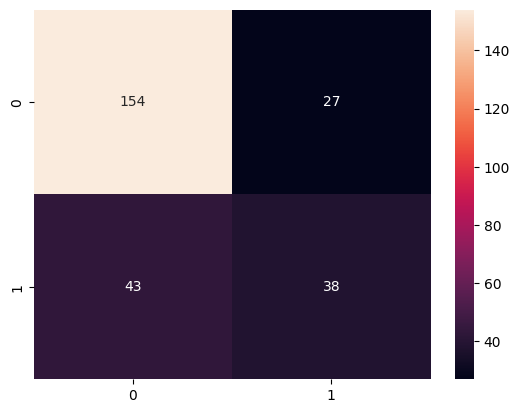

In [44]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
cm = confusion_matrix(y_test,preds)
print(cm)
sns.heatmap(cm, annot=True, fmt="d")
print(classification_report(y_test, preds))

# SVM

In [45]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
acc_treino = svm.score(X_train, y_train)
print("acc_treino:", acc_treino)

preds = svm.predict(X_test)

acc_teste = accuracy_score(y_test, preds)
print("acc_teste:", acc_teste)

acc_treino: 0.8099331423113658
acc_teste: 0.7290076335877863


[[159  22]
 [ 49  32]]
              precision    recall  f1-score   support

         0.0       0.76      0.88      0.82       181
         1.0       0.59      0.40      0.47        81

    accuracy                           0.73       262
   macro avg       0.68      0.64      0.65       262
weighted avg       0.71      0.73      0.71       262



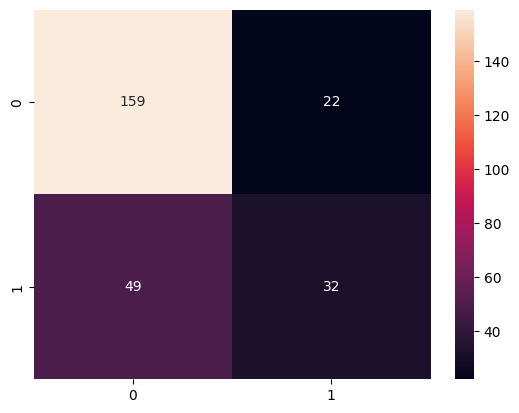

In [46]:
cm = confusion_matrix(y_test,preds)
print(cm)
sns.heatmap(cm, annot=True, fmt="d")
print(classification_report(y_test, preds))